#### Doing Binary Classification using Keras

In [27]:
%%capture
!pip install mlxtend
!pip install --upgrade tensorflow

In [28]:
!pip install opencv-python
from urllib.request import urlopen
from PIL import Image
import IPython
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import mnist, fashion_mnist
import random
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.losses import CategoricalCrossentropy,SparseCategoricalCrossentropy,BinaryCrossentropy
from sklearn.datasets import make_blobs
from mlxtend.plotting import plot_decision_regions
import tensorflow as tf
print(tf.__version__)
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2.12.0


In [29]:
from PIL import Image
import os, os.path

imgs = []
path = "/Users/anshirsa/OneDrive - Capgemini/Documents/IBM Machine Learning/images"
valid_images = [ ".png",".jpg"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(Image.open(os.path.join(path,f)))

In [30]:
def generate_binary_blobs(num_samples_total, training_split, loss_function_used):
    X, targets = make_blobs(n_samples = num_samples_total, centers = [(0,0), (15,15)], n_features = 2, center_box=(0, 1), cluster_std = 2.5)
    targets[np.where(targets == 0)] = -1
    X_training = X[training_split:, :]
    X_testing = X[:training_split, :]
    Targets_training = targets[training_split:]
    Targets_testing = targets[:training_split]
    return X_training, Targets_training, X_testing, Targets_testing

In [31]:
num_samples = 2825
test_split = 1025
cluster_centers = [(15,0), (30,15)]
num_classes = len(cluster_centers)
loss_function_used = BinaryCrossentropy(from_logits=False)

In [32]:
X_training, Targets_training, X_testing, Targets_testing=generate_binary_blobs(num_samples, test_split, loss_function_used)

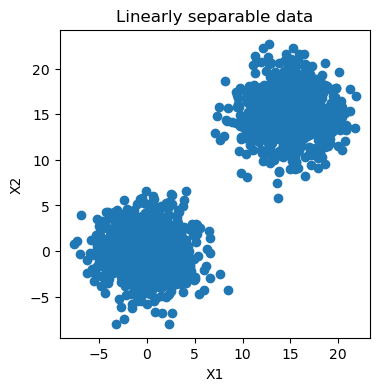

In [33]:
plt.figure(figsize=(4, 4))
plt.scatter(X_training[:,0], X_training[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [34]:
feature_vector_shape = X_training.shape[1]
input_shape = (feature_vector_shape,)

model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation = 'sigmoid'))

In [35]:
model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
history = model.fit(X_training, Targets_training, epochs=50, batch_size=20, verbose=1, validation_split=0.2)

Epoch 1/50
72/72 [==============================] - 1s 3ms/step - loss: -19.8222 - accuracy: 0.4250 - val_loss: -68.1459 - val_accuracy: 0.4750
Epoch 2/50
72/72 [==============================] - 0s 2ms/step - loss: -258.0999 - accuracy: 0.4812 - val_loss: -573.3442 - val_accuracy: 0.4639
Epoch 3/50
72/72 [==============================] - 0s 2ms/step - loss: -1295.6010 - accuracy: 0.4910 - val_loss: -2223.1318 - val_accuracy: 0.4722
Epoch 4/50
72/72 [==============================] - 0s 2ms/step - loss: -3936.2778 - accuracy: 0.5014 - val_loss: -5875.3350 - val_accuracy: 0.4722
Epoch 5/50
72/72 [==============================] - 0s 2ms/step - loss: -9010.5576 - accuracy: 0.5042 - val_loss: -12273.4551 - val_accuracy: 0.4750
Epoch 6/50
72/72 [==============================] - 0s 2ms/step - loss: -17378.4531 - accuracy: 0.5021 - val_loss: -22245.2324 - val_accuracy: 0.4750
Epoch 7/50
72/72 [==============================] - 0s 2ms/step - loss: -29643.6719 - accuracy: 0.5035 - val_loss: 

In [36]:
test_results = model.evaluate(X_testing, Targets_testing, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

33/33 [==============================] - 0s 1ms/step - loss: -8949705.0000 - accuracy: 0.4741
Test results - Loss: -8949705.0 - Accuracy: 47.41463363170624%


9600/9600 [==============================] - 10s 1ms/step


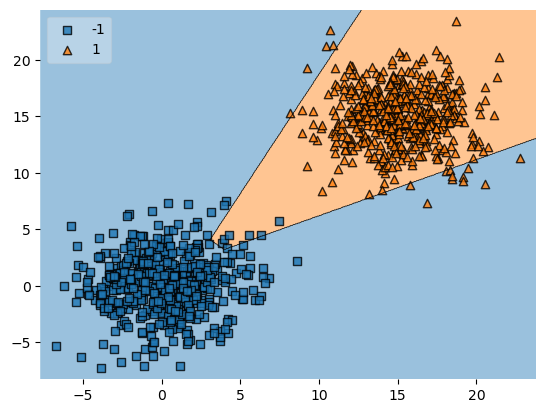

<Figure size 400x400 with 0 Axes>

In [37]:
plot_decision_regions(X_testing, Targets_testing, clf=model, legend=2)
plt.figure(figsize=(4, 4))
plt.show()

Using Binary Classification, we can see that the images dataset has been successfully clustered into two categories
(These two categories are Lions and Cheetahs)

#### Image Classification using Keras

In [38]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
 
img_width, img_height = 200, 200

In [39]:
train_data_dir = '/Users/anshirsa/OneDrive - Capgemini/Documents/IBM Machine Learning/images/train'
validation_data_dir = '/Users/anshirsa/OneDrive - Capgemini/Documents/IBM Machine Learning/images/test'
nb_train_samples = 1800
nb_validation_samples = 1025
epochs = 15
batch_size = 50

In [40]:
# Defining the path for the data library
import pathlib
data_dir = "/Users/anshirsa/OneDrive - Capgemini/Documents/IBM Machine Learning/images/train/"
data_dir = pathlib.Path(data_dir)

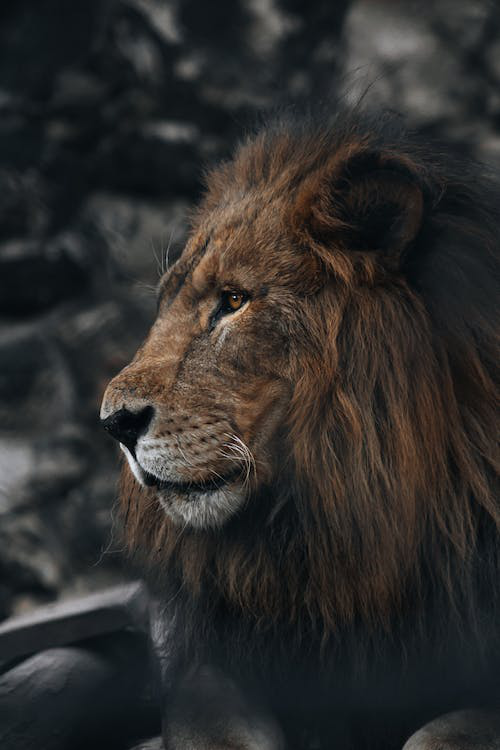

In [41]:
# Defining Lions images directory
Lions = list(data_dir.glob('Lions/*'))
PIL.Image.open(str(Lions[0]))

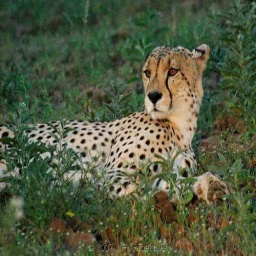

In [42]:
# Defining Cheetahs images directory
Cheetahs = list(data_dir.glob('Cheetahs/*'))
PIL.Image.open(str(Cheetahs[0]))

In [43]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [44]:
# Building the model
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [45]:
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [46]:
# Training the model
train_datagen = ImageDataGenerator(
    rescale=1.0/200,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1.0/200)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 1800 images belonging to 2 classes.
Found 1025 images belonging to 2 classes.
Epoch 1/15
36/36 [==============================] - 45s 1s/step - loss: 0.7968 - accuracy: 0.5311 - val_loss: 0.6632 - val_accuracy: 0.5530
Epoch 2/15
36/36 [==============================] - 43s 1s/step - loss: 0.6521 - accuracy: 0.6211 - val_loss: 0.7078 - val_accuracy: 0.5680
Epoch 3/15
36/36 [==============================] - 43s 1s/step - loss: 0.6018 - accuracy: 0.6933 - val_loss: 0.5992 - val_accuracy: 0.6190
Epoch 4/15
36/36 [==============================] - 48s 1s/step - loss: 0.5423 - accuracy: 0.7300 - val_loss: 0.4423 - val_accuracy: 0.8260
Epoch 5/15
36/36 [==============================] - 50s 1s/step - loss: 0.5173 - accuracy: 0.7578 - val_loss: 0.4307 - val_accuracy: 0.8200
Epoch 6/15
36/36 [==============================] - 47s 1s/step - loss: 0.4891 - accuracy: 0.7756 - val_loss: 0.5587 - val_accuracy: 0.7320
Epoch 7/15
36/36 [==============================] - 45s 1s/step - loss: 0.48

In [47]:
model.save_weights('model_saved.h5')

In [48]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np

model = VGG16(weights='imagenet')

# Saving and loading a model should have only one line each
model.save("/Users/anshirsa/Downloads/model.h5")
model = load_model("/Users/anshirsa/Downloads/model.h5")

image = load_img('/Users/anshirsa/OneDrive - Capgemini/Documents/IBM Machine Learning/images/test/Cheetahs/fff9461861633cd1.png', target_size=(224, 224))
img = img_to_array(image)
img = preprocess_input(img)
img = np.expand_dims(img, axis=0)

label = model.predict(img)
print("Predicted Class (0 - Cheetahs, 1 - Lions): ", np.argmax(label))

1/1 [==============================] - 0s 470ms/step
Predicted Class (0 - Cheetahs, 1 - Lions):  293


#### Doing Image Classification with CNN method using Tensorflow

In [49]:
#importing libraries 
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [50]:
# Preprocessing the training and test data
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [51]:
# Defining the data directory for both the training and test data set
train_dataset = train.flow_from_directory(r"C:\Users\anshirsa\OneDrive - Capgemini\Documents\IBM Machine Learning\images\train",
                                          target_size=(200,200),
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory(r"C:\Users\anshirsa\OneDrive - Capgemini\Documents\IBM Machine Learning\images\test",
                                          target_size=(200,200),
                                          class_mode = 'binary')

Found 1800 images belonging to 2 classes.
Found 1025 images belonging to 2 classes.


In [52]:
# Building the CNN model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [53]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
model.fit(train_dataset,
         steps_per_epoch = 30,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
30/30 [==============================] - 44s 1s/step - loss: 0.7061 - accuracy: 0.5469 - val_loss: 0.6305 - val_accuracy: 0.7190
Epoch 2/10
30/30 [==============================] - 44s 1s/step - loss: 0.6112 - accuracy: 0.6848 - val_loss: 0.4744 - val_accuracy: 0.7893
Epoch 3/10
30/30 [==============================] - 41s 1s/step - loss: 0.4871 - accuracy: 0.7788 - val_loss: 0.4336 - val_accuracy: 0.8020
Epoch 4/10
30/30 [==============================] - 41s 1s/step - loss: 0.4312 - accuracy: 0.8013 - val_loss: 0.4243 - val_accuracy: 0.8166
Epoch 5/10
30/30 [==============================] - 46s 2s/step - loss: 0.4078 - accuracy: 0.8146 - val_loss: 0.4725 - val_accuracy: 0.7629
Epoch 6/10
30/30 [==============================] - 41s 1s/step - loss: 0.4102 - accuracy: 0.8188 - val_loss: 0.4048 - val_accuracy: 0.8361
Epoch 7/10
30/30 [==============================] - 41s 1s/step - loss: 0.4339 - accuracy: 0.8194 - val_loss: 0.4691 - val_accuracy: 0.7766
Epoch 8/10
30/30 [==

1/1 [==============================] - 0s 109ms/step
This is an image of a Lion


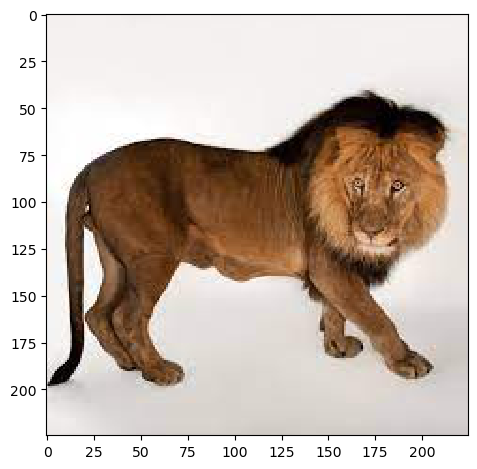

In [55]:
# Load and show an image in pillow
from PIL import Image
import os, os.path
from skimage import io

img_height = 200
img_width = 200


imgs = []
path = "/users/anshirsa/Downloads/Lion_Sample_Image.jpg"
valid_images = [ ".jpg",".jpeg",".png"]

image = io.imread("/users/anshirsa/Downloads/Lion_Sample_Image.jpg")

# Loading the image
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])

if score > 0.5:
    io.imshow(image)
    print("This is an image of a Lion")
else:
    io.imshow(image)
    print("This is an image of a Cheetah")

1/1 [==============================] - 0s 40ms/step
This is an image of a Cheetah


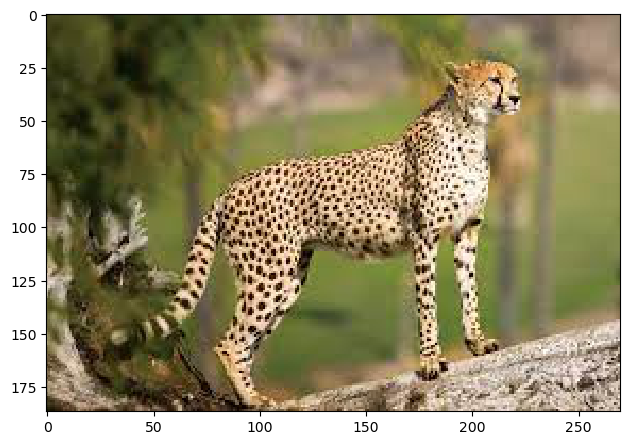

In [56]:
# Load and show an image in pillow
from PIL import Image
import os, os.path
from skimage import io

img_height = 200
img_width = 200


imgs = []
path = "/users/anshirsa/Downloads/cheetah_sample_image.jpg"
valid_images = [ ".jpg",".jpeg",".png"]

image = io.imread("/users/anshirsa/Downloads/cheetah_sample_image.jpg")

# Loading the image
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])

if score > 0.5:
    io.imshow(image)
    print("This is an image of a Lion")
else:
    io.imshow(image)
    print("This is an image of a Cheetah")